# Project: Investigate a Dataset (Soccer Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This database contains a vast amount of soccer data from 2007 to 2015 in a .sqllite file. I used DB Browser to export the needed dataset as a .csv file. There are 8 tables in this database but the scope of my analysis will be limited to two, that is, player and player attributes. With this table we are exploring the questions our scouting team asked us, using the 2016 season.
1) How many of the players were left footed?, what is the proportion of left footed players comapred to the total population.<br> 
2) Does height have an effect on a players jumping ability?<br> 
3) The scouts are intrested in recommending Ronaldo because of his ariel threat but they want to know; Has time has affected his jumping ability?,  also, determine abilities he improved on the most and area(s) he drastically declined as an attacker using the first season(2007) and last season (2015).<br>
4) Is there a correlation between weight, height and acceleration?<br>


In [142]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling
>In this step we are intrested in gathering our data frame and assesing them. This is being done to expose the areas with dirty data and prepare them for thorough cleaning in the next step.

### General Properties

In [143]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# index=False did not work hence the use of index_col = 0
# Sep, to tell the pandas where to seperate the data.
filepath1= 'C:/Users/Faluta Akinbowale/Desktop/Data Science/Python for Data analysis/lessons/Project 1/The Data Set/player.csv'
filepath2='C:/Users/Faluta Akinbowale/Desktop/Data Science/Python for Data analysis/lessons/Project 1/The Data Set/player_attributes.csv'
df_player= pd.read_csv(filepath1, index_col= 0, sep=';' )
df_atr= pd.read_csv(filepath2, index_col= 0, sep=';')

##### General Properties of Player Data frame
>Here we are intrested in checking for basic properties of this data frame. This is an important step as it gives us an understanding of what we are dealing with. The following is the list of steps to be carried out in this section;
-I will be inspecting the data frame using .head(), this gives us a peek into the data we are dealing with. <br>
-Checking for the basic statistics of the data frame using .describe(). <br>
-Checking for its information, such as number of rows x column, names of columns and the type of data types we would be dealing with. This also exposes any wrong data type we might be dealing with. To do this, .info() would be used.<br>
-The data frame would also be checked for duplicate values and nulls using .duplicated() and .isnull() respectively in order to find out if we have cases of duplicated or empty rows in our data frame.<br> 

In [144]:
# lets inspect the data using .head() function
df_player.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [145]:
# This gives us a statistical summary of the data frame
df_player.describe()

,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000
mean,156582.427215,165664.910488,181.867445,168.380289
std,160713.700624,58649.928360,6.369201,14.990217
min,2625.000000,2.000000,157.480000,117.000000
25%,35555.500000,151889.500000,177.800000,159.000000
50%,96619.500000,184671.000000,182.880000,168.000000
75%,212470.500000,203883.250000,185.420000,179.000000
max,750584.000000,234141.000000,208.280000,243.000000


In [146]:
#Lets explore the datatypes in this dataframe
df_player.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 1 to 11075
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_api_id       11060 non-null  int64  
 1   player_name         11060 non-null  object 
 2   player_fifa_api_id  11060 non-null  int64  
 3   birthday            11060 non-null  object 
 4   height              11060 non-null  float64
 5   weight              11060 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 604.8+ KB


><b>From here we can see that we have 11060 rows x 5 columns.<b> <br> We have some int values, string and float.<br> The table looks okay to work with but to make it perfect,  the birthday column would be dropped in the next step. 

In [147]:
#check for nulls and duplicates
df_player.isnull().sum()

player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

<b> There are no null values in our columns. Perfect!

In [148]:
# let's check the data frame for the sum of duplicated values.
df_player.duplicated().sum()

0

><b> Also, there are no duplicates!

##### General Properties of Player Attribute Data Frame
>This is the second data frame we would be dealing with. It looks bulky. I will explore this data frame, discover some basic properties. Basically, I will be repeating the steps I took in the player data frame. They are as follows;
-Checking for the basic statistics of the data frame using .describe().<br>
-Checking for its information, such as number of rows x column, names of columns and the type of data types we would be dealing with. This also exposes any wrong data type we might be dealing with. To do this, .info() would be used.<br>
-The data frame would also be checked for duplicate values and nulls using .duplicated() and .isnull() respectively in order to find out if we have cases of duplicated or empty rows in our data frame.

In [149]:
# lets inspect the data using .head() function to peek into the data frame
df_atr.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


><b> It is a bulky data, no surprise there. We are dealing with a vast amount of players from multiple leagues. <br> From here we can only confirm the amount of columns 41. What about rows?

In [150]:
# This gives us a statistical summary of the data frame
df_atr.describe()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [151]:
#Lets explore the datatypes in this dataframe
df_atr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

><b>From here we can see that we have 183978 rows x 41 columns.
We have some int values, string and float.
The table looks terrifying to work with but to make it perfect, multiple columns would be dropped in the next step.

In [152]:
#check for nulls and duplicates
df_atr.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

<b> It seems like we have a case here. There are loads of null values. Using the max of 3230 rows, that's the amount of rows we would be dropping in order to eliminate all null values.

In [153]:
# let's check the data frame for the sum of duplicated values.
df_atr.duplicated().sum()

1

><b> We are good to go. We would drop the duplicated data, unwanted columns as well as the null data in the next step.



## Data Cleaning
### Here we would be cleaning both data set, i.e, dropping unwanted columns, nulls and duplicate rows

### After discussing the structure of the data and any problems that need to be
###   cleaned, let's perform those cleaning steps in the second part of this section.
>##### 1) Looking at the player dataframe, birthday column will be dropped as it is of no use to this analysis.
>##### 2) In the player attribute dataframe,drop all missing values and duplicates if any.
>##### 3) In the player attribute dataframe, drop all the columns that won't be used in the analysis.
>##### 4) In the player attribute dataframe, date has a wrong datatype and only year is needed after changing the datatype.
>##### 5) In the player attribute dataframe, convert all abilities from float to int as abilities are usually measured in whole numbers.
 
 

### Data cleaning ( Player data frame)


### Task 1: Drop birthday column.

In [154]:
# First let us check the data
df_player.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [155]:
#Dropping the column
df_player.drop(['birthday'], axis=1 ,inplace=True)

In [156]:
#check to confirm the column has been dropped
#Height is more appropriate as a float data type. With this, the dataframe is clean and ready for use.
df_player.head()

,player_api_id,player_name,player_fifa_api_id,height,weight
id,,,,,
1,505942,Aaron Appindangoye,218353,182.88,187
2,155782,Aaron Cresswell,189615,170.18,146
3,162549,Aaron Doran,186170,170.18,163
4,30572,Aaron Galindo,140161,182.88,198
5,23780,Aaron Hughes,17725,182.88,154


### Task 2: In the player attribute dataframe, drop all missing values and duplicates.

In [157]:
# In the player atribute table;
# I will drop columns with null values and duplicate values.
# Also I will be dropping unneeded columns and selecting only year for our date. In an attempt to make our work cleaner and easier to handle.

# I will convert all floats to int as abilities are in whole numbers. 

In [158]:
# To drop columns with null values I will check the affected rows using .info()
df_atr.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

In [159]:
# To get the sum of null present in the dataframe.
df_atr.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [160]:
#According to the sum of nulls, a total of 2713 null rows were dropped. Considering this is a vast database we still have enough data to work with. 
# lets drop the rows that do not have values in them
df_atr.dropna(inplace=True)

><b> Here the missing values were dropped. A total of 3230 rows were deleted.

In [161]:
#Checking the result to see if the change has been effected
df_atr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   180354 non-null  int64  
 1   player_api_id        180354 non-null  int64  
 2   date                 180354 non-null  object 
 3   overall_rating       180354 non-null  float64
 4   potential            180354 non-null  float64
 5   preferred_foot       180354 non-null  object 
 6   attacking_work_rate  180354 non-null  object 
 7   defensive_work_rate  180354 non-null  object 
 8   crossing             180354 non-null  float64
 9   finishing            180354 non-null  float64
 10  heading_accuracy     180354 non-null  float64
 11  short_passing        180354 non-null  float64
 12  volleys              180354 non-null  float64
 13  dribbling            180354 non-null  float64
 14  curve                180354 non-null  float64
 15  free_kick_accurac

<b> Now, i will drop the duplicate rows

In [162]:
# let's drop the duplicated rows.

df_atr.drop_duplicates(inplace=True)
 

In [163]:
#To confirm it has been dropped
df_atr.duplicated().sum()

0

><b>Perfect!
Now there are no duplicates in this data frame.

### Task 3: In the player attribute dataframe, drop all the columns that won't be used in the analysis
>Data analysis often involve reassesing your data based based on findings you get in the EDA and while asking your questions or perhaps realising that you could explore your data in a more meaningful way. By the time i edited this writing I already explored the database and I found out that i could make things easier by dropping columns that won't be used, also from my previous analysis I knew what columns to drop.
The columns I would be dropping won't have any effect on my analysis and hence there is no need to keep them around.

In [164]:
# A brief view into our data
df_atr.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [165]:
# We will need this to know the columns to drop since it comes with an index. That made my life easier.
df_atr.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   180354 non-null  int64  
 1   player_api_id        180354 non-null  int64  
 2   date                 180354 non-null  object 
 3   overall_rating       180354 non-null  float64
 4   potential            180354 non-null  float64
 5   preferred_foot       180354 non-null  object 
 6   attacking_work_rate  180354 non-null  object 
 7   defensive_work_rate  180354 non-null  object 
 8   crossing             180354 non-null  float64
 9   finishing            180354 non-null  float64
 10  heading_accuracy     180354 non-null  float64
 11  short_passing        180354 non-null  float64
 12  volleys              180354 non-null  float64
 13  dribbling            180354 non-null  float64
 14  curve                180354 non-null  float64
 15  free_kick_accurac

In [166]:
# verifying the columns after manually entering 25 numbers, this won't be ideal for bigger data sets. Hence the need to learn how to use index for selection.
df_atr.columns[[1,3,4,6,8,11,12,13,14,16,17,19,20,25,28,29,31,33,34,35,36,37,38,39,40]]

Index(['player_api_id', 'overall_rating', 'potential', 'attacking_work_rate',
       'crossing', 'short_passing', 'volleys', 'dribbling', 'curve',
       'long_passing', 'ball_control', 'sprint_speed', 'agility', 'stamina',
       'aggression', 'interceptions', 'vision', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [167]:
# Drop columns based on column index as it is faster using iloc than typing in label names. 
# Sadly i could not find a way to index my selection except i repeat each iloc statement indexing what i want in each.
# The numbers represents the columns thanks to "axis=1"

df_atr = df_atr.drop(df_atr.columns[[1,3,4,6,8,11,12,13,14,16,17,19,20,25,28,29,31,33,34,35,36,37,38,39,40]],axis =1)
print(df_atr)  

        player_fifa_api_id                 date preferred_foot  \
id                                                               
1                   218353  2016-02-18 00:00:00          right   
2                   218353  2015-11-19 00:00:00          right   
3                   218353  2015-09-21 00:00:00          right   
4                   218353  2015-03-20 00:00:00          right   
5                   218353  2007-02-22 00:00:00          right   
...                    ...                  ...            ...   
183974              102359  2009-08-30 00:00:00          right   
183975              102359  2009-02-22 00:00:00          right   
183976              102359  2008-08-30 00:00:00          right   
183977              102359  2007-08-30 00:00:00          right   
183978              102359  2007-02-22 00:00:00          right   

       defensive_work_rate  finishing  heading_accuracy  free_kick_accuracy  \
id                                                            

In [168]:
#I want to check if I dropped the right columns
df_atr.head()

,player_fifa_api_id,date,preferred_foot,defensive_work_rate,finishing,heading_accuracy,free_kick_accuracy,acceleration,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties
id,,,,,,,,,,,,,,,,
1,218353,2016-02-18 00:00:00,right,medium,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0
2,218353,2015-11-19 00:00:00,right,medium,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0
3,218353,2015-09-21 00:00:00,right,medium,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0
4,218353,2015-03-20 00:00:00,right,medium,43.0,70.0,38.0,60.0,46.0,65.0,54.0,58.0,76.0,34.0,44.0,47.0
5,218353,2007-02-22 00:00:00,right,medium,43.0,70.0,38.0,60.0,46.0,65.0,54.0,58.0,76.0,34.0,44.0,47.0


>The right columns were dropped and it looks like the data is easier to handle and understand.

In [169]:
# To check if the changes have taken place
df_atr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 1 to 183978
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   180354 non-null  int64  
 1   date                 180354 non-null  object 
 2   preferred_foot       180354 non-null  object 
 3   defensive_work_rate  180354 non-null  object 
 4   finishing            180354 non-null  float64
 5   heading_accuracy     180354 non-null  float64
 6   free_kick_accuracy   180354 non-null  float64
 7   acceleration         180354 non-null  float64
 8   reactions            180354 non-null  float64
 9   balance              180354 non-null  float64
 10  shot_power           180354 non-null  float64
 11  jumping              180354 non-null  float64
 12  strength             180354 non-null  float64
 13  long_shots           180354 non-null  float64
 14  positioning          180354 non-null  float64
 15  penalties        

><b> Now I have 15 columns to work with for this dataframe.

### Task 4: In the player attribute dataframe, date has a wrong datatype and only year is needed after changing the datatype.

In [170]:
#correcting the date data type from object to datetime
df_atr['date'] = pd.to_datetime(df_atr['date'])

In [171]:
# This confirms if the first row under data column has changed to datetime data type.
type(df_atr['date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [172]:
# Selecting only year from date column and appending a column labelled year to hold the result. 
df_atr['year'] = pd.DatetimeIndex(df_atr['date']).year

In [173]:
# Drop the original date column
df_atr.drop(['date'], axis=1, inplace=True)

In [174]:
#checking the data types of our data set
df_atr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 1 to 183978
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   180354 non-null  int64  
 1   preferred_foot       180354 non-null  object 
 2   defensive_work_rate  180354 non-null  object 
 3   finishing            180354 non-null  float64
 4   heading_accuracy     180354 non-null  float64
 5   free_kick_accuracy   180354 non-null  float64
 6   acceleration         180354 non-null  float64
 7   reactions            180354 non-null  float64
 8   balance              180354 non-null  float64
 9   shot_power           180354 non-null  float64
 10  jumping              180354 non-null  float64
 11  strength             180354 non-null  float64
 12  long_shots           180354 non-null  float64
 13  positioning          180354 non-null  float64
 14  penalties            180354 non-null  float64
 15  year             

><b> That section is now complete. We can go ahead to merge/join the two dataframe using player_fifa_api_id on both tables. player_fifa_api_id acts as a Primary key on one table and Foreign key on the other.  

### Task 5: In the player attribute dataframe, convert all floats to int.
>Abilities are preferrably stored as Whole numbers(int). Throughout the data frame, ability's column did not have anything after the decimal point so why keep them as floats. Ints looks easier on the eye and makes the data more organzied

In [175]:
# To peek into our data
df_atr.head()

,player_fifa_api_id,preferred_foot,defensive_work_rate,finishing,heading_accuracy,free_kick_accuracy,acceleration,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties,year
id,,,,,,,,,,,,,,,,
1,218353,right,medium,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0,2016
2,218353,right,medium,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0,2015
3,218353,right,medium,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0,2015
4,218353,right,medium,43.0,70.0,38.0,60.0,46.0,65.0,54.0,58.0,76.0,34.0,44.0,47.0,2015
5,218353,right,medium,43.0,70.0,38.0,60.0,46.0,65.0,54.0,58.0,76.0,34.0,44.0,47.0,2007


In [176]:
# To confirm we are indexing correctly
df_atr.iloc[:,3:]

,finishing,heading_accuracy,free_kick_accuracy,acceleration,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties,year
id,,,,,,,,,,,,,
1,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0,2016
2,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0,2015
3,44.0,71.0,39.0,60.0,47.0,65.0,55.0,58.0,76.0,35.0,45.0,48.0,2015
4,43.0,70.0,38.0,60.0,46.0,65.0,54.0,58.0,76.0,34.0,44.0,47.0,2015
5,43.0,70.0,38.0,60.0,46.0,65.0,54.0,58.0,76.0,34.0,44.0,47.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183974,77.0,59.0,78.0,66.0,86.0,73.0,76.0,58.0,67.0,81.0,86.0,83.0,2009
183975,76.0,53.0,74.0,66.0,74.0,73.0,75.0,58.0,65.0,73.0,72.0,70.0,2009
183976,71.0,53.0,74.0,66.0,74.0,73.0,75.0,58.0,65.0,73.0,72.0,70.0,2008


><b>Here, the data was sliced using iloc to ensure that the correct columns were picked. 

In [177]:
# Here iloc is being used to select column index. The aim is to convert float to int data type
# Converting float to int

df_atr.iloc[:,3:]= df_atr.iloc[:,3:].astype('int64')

In [178]:
# To check if the changes have been included
df_atr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 1 to 183978
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   player_fifa_api_id   180354 non-null  int64 
 1   preferred_foot       180354 non-null  object
 2   defensive_work_rate  180354 non-null  object
 3   finishing            180354 non-null  int64 
 4   heading_accuracy     180354 non-null  int64 
 5   free_kick_accuracy   180354 non-null  int64 
 6   acceleration         180354 non-null  int64 
 7   reactions            180354 non-null  int64 
 8   balance              180354 non-null  int64 
 9   shot_power           180354 non-null  int64 
 10  jumping              180354 non-null  int64 
 11  strength             180354 non-null  int64 
 12  long_shots           180354 non-null  int64 
 13  positioning          180354 non-null  int64 
 14  penalties            180354 non-null  int64 
 15  year                 180354 non-nu

><b>Now, the data is ready for a deeper level of analysis. 

### Merge the Data Frames
> Here, the two data frames will be merged/joined using an inner join based on primary and secondary key on respective data frame

In [179]:
#finally let us merge the dataframes into one
# Let us perform an inner join
df_combined = df_player.merge(df_atr, left_on='player_fifa_api_id', right_on='player_fifa_api_id', how='inner')

In [180]:
# To check how the merged result looks like
df_combined.head()

,player_api_id,player_name,player_fifa_api_id,height,weight,preferred_foot,defensive_work_rate,finishing,heading_accuracy,free_kick_accuracy,acceleration,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties,year
0,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,60,47,65,55,58,76,35,45,48,2016
1,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,60,47,65,55,58,76,35,45,48,2015
2,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,60,47,65,55,58,76,35,45,48,2015
3,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,60,46,65,54,58,76,34,44,47,2015
4,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,60,46,65,54,58,76,34,44,47,2007


In [181]:
#Checking the statistics of our data frame
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 180353
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        180354 non-null  int64  
 1   player_name          180354 non-null  object 
 2   player_fifa_api_id   180354 non-null  int64  
 3   height               180354 non-null  float64
 4   weight               180354 non-null  int64  
 5   preferred_foot       180354 non-null  object 
 6   defensive_work_rate  180354 non-null  object 
 7   finishing            180354 non-null  int64  
 8   heading_accuracy     180354 non-null  int64  
 9   free_kick_accuracy   180354 non-null  int64  
 10  acceleration         180354 non-null  int64  
 11  reactions            180354 non-null  int64  
 12  balance              180354 non-null  int64  
 13  shot_power           180354 non-null  int64  
 14  jumping              180354 non-null  int64  
 15  strength         

In [182]:
df_combined

,player_api_id,player_name,player_fifa_api_id,height,weight,preferred_foot,defensive_work_rate,finishing,heading_accuracy,free_kick_accuracy,acceleration,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties,year
0,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,60,47,65,55,58,76,35,45,48,2016
1,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,60,47,65,55,58,76,35,45,48,2015
2,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,60,47,65,55,58,76,35,45,48,2015
3,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,60,46,65,54,58,76,34,44,47,2015
4,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,60,46,65,54,58,76,34,44,47,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180349,39902,Zvjezdan Misimovic,102359,180.34,176,right,low,77,59,78,66,86,73,76,58,67,81,86,83,2009
180350,39902,Zvjezdan Misimovic,102359,180.34,176,right,low,76,53,74,66,74,73,75,58,65,73,72,70,2009
180351,39902,Zvjezdan Misimovic,102359,180.34,176,right,low,71,53,74,66,74,73,75,58,65,73,72,70,2008
180352,39902,Zvjezdan Misimovic,102359,180.34,176,right,low,64,57,73,61,69,73,72,58,59,78,68,53,2007


In [183]:
# I would like to check the data frame for duplicates in this merged data frame.
# check for nulls

df_combined.duplicated().sum()

46400

><b> Wow! <b>
><b>  There are 46,400 duplicated rows 

In [184]:
# Drop the duplicates
df_combined.drop_duplicates(inplace=True)

In [185]:
#reconfirm
df_combined.duplicated().sum()

0

In [186]:
# This is to check if it has reflected
df_combined.head()

,player_api_id,player_name,player_fifa_api_id,height,weight,preferred_foot,defensive_work_rate,finishing,heading_accuracy,free_kick_accuracy,acceleration,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties,year
0,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,60,47,65,55,58,76,35,45,48,2016
1,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,60,47,65,55,58,76,35,45,48,2015
3,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,60,46,65,54,58,76,34,44,47,2015
4,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,60,46,65,54,58,76,34,44,47,2007
5,155782,Aaron Cresswell,189615,170.18,146,left,medium,53,58,69,79,67,90,71,85,56,62,60,59,2016


In [187]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133954 entries, 0 to 180353
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        133954 non-null  int64  
 1   player_name          133954 non-null  object 
 2   player_fifa_api_id   133954 non-null  int64  
 3   height               133954 non-null  float64
 4   weight               133954 non-null  int64  
 5   preferred_foot       133954 non-null  object 
 6   defensive_work_rate  133954 non-null  object 
 7   finishing            133954 non-null  int64  
 8   heading_accuracy     133954 non-null  int64  
 9   free_kick_accuracy   133954 non-null  int64  
 10  acceleration         133954 non-null  int64  
 11  reactions            133954 non-null  int64  
 12  balance              133954 non-null  int64  
 13  shot_power           133954 non-null  int64  
 14  jumping              133954 non-null  int64  
 15  strength         

### The data frame looks clean enough and ready for EDA analysis

<a id='eda'></a>
## Exploratory Data Analysis



> Now that the data has been trimmed and cleaned, It can now be explored using visuals. Here, the dataframe statistics and visualization will be explored with the aim of addressing the research questions that was posed in the Introduction section. 

> #### Using this combined table, EDA will be used to look at a single variable before exploring the relationships between variables

In [188]:
# checking the statistics of the data frame. This would come in hand later.
df_combined.describe()

,player_api_id,player_fifa_api_id,height,weight,finishing,heading_accuracy,free_kick_accuracy,acceleration,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties,year
count,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000,133954.000000
mean,131047.979187,164107.280029,181.907984,168.959076,50.036020,57.500090,49.390216,67.687408,66.078303,65.249668,61.803477,66.951327,67.445929,53.304985,55.999500,55.241635,2012.134367
std,134218.071177,54376.757431,6.394566,15.084942,19.176612,16.495995,17.816459,12.844889,9.247491,12.901588,16.088175,10.985866,12.089955,18.374442,18.448955,15.592219,2.697819
min,2625.000000,2.000000,157.480000,117.000000,1.000000,1.000000,1.000000,10.000000,17.000000,12.000000,2.000000,14.000000,10.000000,1.000000,2.000000,2.000000,2007.000000
25%,34101.000000,152677.000000,177.800000,159.000000,34.000000,50.000000,37.000000,61.000000,61.000000,58.000000,54.000000,60.000000,60.000000,41.000000,45.000000,45.000000,2010.000000
50%,72536.500000,182440.000000,182.880000,168.000000,53.000000,60.000000,50.000000,69.000000,67.000000,67.000000,65.000000,68.000000,69.000000,58.000000,60.000000,57.000000,2013.000000
75%,185389.000000,199169.000000,185.420000,179.000000,66.000000,69.000000,63.000000,76.000000,72.000000,74.000000,73.000000,74.000000,76.000000,67.000000,70.000000,67.000000,2014.000000
max,750584.000000,234141.000000,208.280000,243.000000,97.000000,98.000000,97.000000,97.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,95.000000,96.000000,2016.000000


### Exploring Height as a Univariate Data  
> using a univariate data to describe the heights of players in this data frame. 
.<br> They will be classified into Short, Average and Tall.




In [189]:
# Lets define a function max using idmax-"max index" to identify the index of the maximum value of a particular column. Then fetches the row.

def max(x):
    #cmax will be used to locate the index associated with the maximum height.
    max_valueid= df_combined[x].idxmax()
    #To fetch the data 
    max_id = pd.DataFrame(df_combined.loc[max_valueid,:])
    
    #show the row of the player with the highest height
    return pd.concat([max_id],axis = 1)


max('height')
    
    
    

,96046
player_api_id,148325
player_name,Kristof van Hout
player_fifa_api_id,185306
height,208.28
weight,243
preferred_foot,right
defensive_work_rate,medium
finishing,13
heading_accuracy,17
free_kick_accuracy,15


In [190]:
#Testing our newly defined function. So cool!
max('finishing')

,100457
player_api_id,30981
player_name,Lionel Messi
player_fifa_api_id,158023
height,170.18
weight,159
preferred_foot,left
defensive_work_rate,low
finishing,97
heading_accuracy,71
free_kick_accuracy,86


<b> Now i see the effect of function

In [191]:
#I was trying my hands on the groupby method 
df_combined.groupby('year')

In [192]:
#A quick diversion 
df_combined.groupby(['preferred_foot'], as_index=False)['heading_accuracy'].mean()

,preferred_foot,heading_accuracy
0,left,57.641756
1,right,57.454357


><b>While working I was intrested in knowing if there was a significant difference between left and right footed players 
while comapring their heading accuracy.since left footed players are considered to acrobatic in nature, I really wanted to know if my hunch was correct. There was little difference and that might have been impacted by the vast amount of right footed players in the data frame

In [193]:
#Back to the question at hand 
# View the min, 25%, 50%, 75%, max height values with Pandas describe
df_combined['height'].describe()

count    133954.000000
mean        181.907984
std           6.394566
min         157.480000
25%         177.800000
50%         182.880000
75%         185.420000
max         208.280000
Name: height, dtype: float64

In [194]:
 # Bin edges will be used to "cut" the data into groups using the data gotten from google. 
# 5ft 4= short, 5ft 10= average, 6ft 4= tall. To capture our minimum value short= min  
bin_edges = [157.48, 177.80, 193.04,208.28 ] 


><b> I used the data gotten from google instead of the usual statistics gotten from our data frame. I did this because I was not sure what is considered short, average or tall and the classification might differ from region to region.

In [195]:
# Labels for the three height status groups
bin_names = [ 'short', 'average' ,'tall' ] 

In [196]:
# Creates height_status column
df_combined['height_status'] = pd.cut(df_combined['height'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_combined.head()

,player_api_id,player_name,player_fifa_api_id,height,weight,preferred_foot,defensive_work_rate,finishing,heading_accuracy,free_kick_accuracy,...,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties,year,height_status
0,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,...,47,65,55,58,76,35,45,48,2016,average
1,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,...,47,65,55,58,76,35,45,48,2015,average
3,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,...,46,65,54,58,76,34,44,47,2015,average
4,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,...,46,65,54,58,76,34,44,47,2007,average
5,155782,Aaron Cresswell,189615,170.18,146,left,medium,53,58,69,...,67,90,71,85,56,62,60,59,2016,short


In [197]:
# Now we can take take and classify them
height_all= df_combined['height_status'].value_counts()
height_all

average    85888
short      45637
tall        2419
Name: height_status, dtype: int64

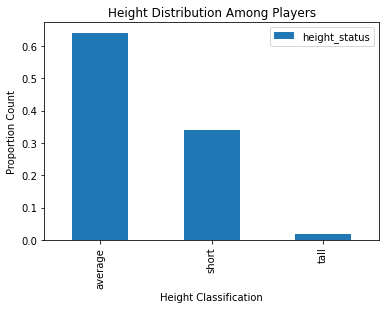

In [198]:
# since its a string we cannot use normal count hence the use of value_count.
# Which in this case counted a unique number of strings 
#Plotting the different types of height
height_all= df_combined['height_status'].value_counts()
height_all= (height_all/ sum(height_all)).plot.bar(xlabel= 'Height Classification', 
ylabel='Proportion Count',title='Height Distribution Among Players')
plt.legend()

height_all;

<B>A BAR CHART SHOWING THE DISTRIBUTION OF PLAYER HEIGHTS

<b>I got a wrong result at first but upon my google search on "how heights are classified in centimeters". I got a fair result.

### Research Question 1 (How many players were left footed?, what is the proportion of left footed players comapred to the total population ?).

In [199]:
df_combined.head()

,player_api_id,player_name,player_fifa_api_id,height,weight,preferred_foot,defensive_work_rate,finishing,heading_accuracy,free_kick_accuracy,...,reactions,balance,shot_power,jumping,strength,long_shots,positioning,penalties,year,height_status
0,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,...,47,65,55,58,76,35,45,48,2016,average
1,505942,Aaron Appindangoye,218353,182.88,187,right,medium,44,71,39,...,47,65,55,58,76,35,45,48,2015,average
3,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,...,46,65,54,58,76,34,44,47,2015,average
4,505942,Aaron Appindangoye,218353,182.88,187,right,medium,43,70,38,...,46,65,54,58,76,34,44,47,2007,average
5,155782,Aaron Cresswell,189615,170.18,146,left,medium,53,58,69,...,67,90,71,85,56,62,60,59,2016,short


In [200]:
pfoot_count= df_combined.groupby('preferred_foot').preferred_foot.count()
pfoot_count

preferred_foot
left      32690
right    101264
Name: preferred_foot, dtype: int64

In [201]:
#Find the proportion
pfoot_count= pfoot_count/sum(pfoot_count)
pfoot_count

preferred_foot
left     0.244039
right    0.755961
Name: preferred_foot, dtype: float64

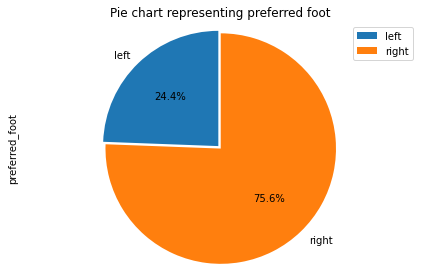

In [202]:
pfoot_count.plot.pie(y=pfoot_count.index,
           shadow=False, 
           explode=(0.03, 0),   # exploding 'proportion of players using left'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.title('Pie chart representing preferred foot')
plt.tight_layout()
plt.legend()
plt.show()

<b> A PIE CHART SHOWING THE PROPORTION OF LEFT FOOTED PLAYERS 

### Research Question 2 (Does height have an effect on a players jumping ability ?)

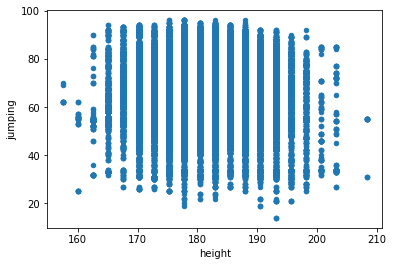

In [203]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Let us explore this further using correlation. Which exposes relationships between two numerical values (height and jumping ability)
import matplotlib.pyplot as plt

df_combined.plot(y='jumping', x='height', kind='scatter', legend=True);



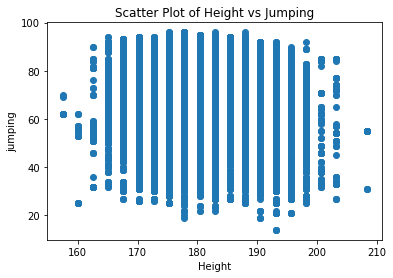

In [204]:
xaxis= df_combined['height']
yaxis=df_combined['jumping']
plt.scatter(xaxis, yaxis)
plt.xlabel('Height')
plt.ylabel('jumping')

plt.title('Scatter Plot of Height vs Jumping')

plt.show()


<b>Apparently, there isn't a clear corelation between the two variables.<b>


### Research Question 3  ( The scouting department is intrested in recommending Ronaldo because of his ariel threat but they want to know if time has affected his jumping ability?,  determine this using the first season(2007) and last season (2015).)

In [205]:
# .
df_alldata=  df_combined[df_combined['player_name'].str.contains('Cristiano Ronaldo')] 
stat_2015=df_alldata.iloc[1,0:]
stat_2015
diff_15=stat_2015.iloc[7:-2]

In [206]:
# To confirm the data selected is accurate
df_alldata.iloc[1,0:]

player_api_id                      30893
player_name            Cristiano Ronaldo
player_fifa_api_id                 20801
height                            185.42
weight                               176
preferred_foot                     right
defensive_work_rate                  low
finishing                             95
heading_accuracy                      86
free_kick_accuracy                    79
acceleration                          91
reactions                             90
balance                               63
shot_power                            94
jumping                               94
strength                              79
long_shots                            93
positioning                           91
penalties                             85
year                                2015
height_status                    average
Name: 32620, dtype: object

In [207]:
#confirming the stat for 2007
stat_2007=df_alldata.iloc[-1,0:]
stat_2007

player_api_id                      30893
player_name            Cristiano Ronaldo
player_fifa_api_id                 20801
height                            185.42
weight                               176
preferred_foot                     right
defensive_work_rate                  low
finishing                             71
heading_accuracy                      74
free_kick_accuracy                    64
acceleration                          91
reactions                             71
balance                               84
shot_power                            80
jumping                               91
strength                              69
long_shots                            72
positioning                           74
penalties                             64
year                                2007
height_status                    average
Name: 32641, dtype: object

In [208]:
#indexing the needed data for 2015
stat_2015.iloc[7:-2]

finishing             95
heading_accuracy      86
free_kick_accuracy    79
acceleration          91
reactions             90
balance               63
shot_power            94
jumping               94
strength              79
long_shots            93
positioning           91
penalties             85
Name: 32620, dtype: object

In [209]:
stat_2007=df_alldata.iloc[-1,0:]
stat_2007
diff_07=stat_2007.iloc[7:-2]

In [210]:
#To determine his most improved and declined abilities 
diff= diff_15 - diff_07
diff

finishing              24
heading_accuracy       12
free_kick_accuracy     15
acceleration            0
reactions              19
balance               -21
shot_power             14
jumping                 3
strength               10
long_shots             21
positioning            17
penalties              21
dtype: object

><b> Quick Summary <br>
<b>1.From the difference it is clear that his jumping abilities have infact improved over the years as it saw a slight improvment, 3.<b> <br>2. His most improved ability seems to be his finishing.<br> 3. Looking at the area he declined as a striker, that would be his balance. Balance is quite critical to a striker and it is a surprise to see a -21 decline in that area.

<b> The most significant improvement is his finishing ability. There is no suprise here as strikers of his caliber improve with experience<b>. Haters will call him penaldo but stats don't lie as he also improved on his penalty taking ability.
<b> It is obvious that he imporved in areas critical for a striker.<b>
    

In [211]:
df_combined['defensive_work_rate'].info()

<class 'pandas.core.series.Series'>
Int64Index: 133954 entries, 0 to 180353
Series name: defensive_work_rate
Non-Null Count   Dtype 
--------------   ----- 
133954 non-null  object
dtypes: object(1)
memory usage: 6.1+ MB


### Research Question 3  (Is there a correlation between weight, height and acceleration ?)

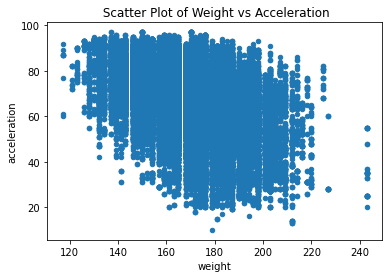

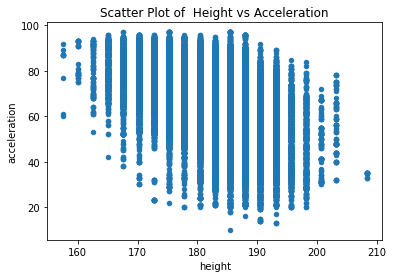

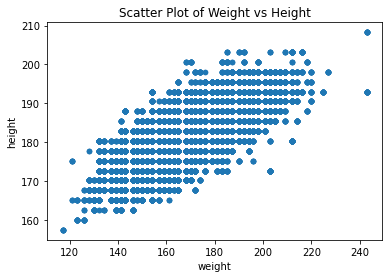

In [212]:
#Lets take a look at wight and speed
df_combined.plot(x='weight', y='acceleration', kind='scatter',title= ' Scatter Plot of Weight vs Acceleration');
df_combined.plot(x='height', y='acceleration', kind='scatter', title= 'Scatter Plot of  Height vs Acceleration');
df_combined.plot(x='weight', y='height', kind='scatter', title= 'Scatter Plot of Weight vs Height');



<b> There seems to be a positive corelation between footballer's height and weight while there is no clear correlation between thier weight and acceleration <b>

<a id='conclusions'></a>
## Conclusions
### <b> Result
At the end of this lesson we can refere to some things based on the calculations that were done. <br>
    <br><b>1.  How many of the players were left footed?, what is the proportion of left footed players comapred to the total population.<br> 
    
 <br>-24.4% of players were left footed while 75.6% were right footed.
 
 <br> <b>  2. Does height have an effect on a player's jumping ability?
    
    
 <br>-There was no correlation between them so this could not be determine at this level of analysis.
     
    
 <br><b>3. The scouts are intrested in recommending Ronaldo because of his ariel threat but they want to know; Has time has affected his jumping ability?,  also, determine abilities he improved on the most and area(s) he drastically declined as an attacker using the first season(2007) and last season (2015)
    
<br>3a. For our scouting team, the answers to the question about Ronaldo was given to them and it gave them confidence to pursue him.<br>
    3b. <br> i. From the difference it is clear that his jumping abilities have infact improved over the years as it saw a slight improvment, (+3).
<br>ii. His most improved ability seems to be his finishing (+24).
<br>iii. Looking at the area he declined as a striker, that would be his balance. Balance is quite critical to a striker and it is a surprise to see a (-21) decline in that area.
    
 <br><b> 4. Is there a correlation between weight, height and acceleration?<br>
    
<br>-Weight and height are positively correlated  while weight or height with acceleration is not showing any correlation.<br>
<br> -There is no clear corelation between height and jumping as well.<br>

### <b> Limitations
 <br>i. The units of weight and height were not included in the documentation, infact there was no documentation.
 <br>ii. Due to missen documentation i was limited to some data sets because i couldn't understand some abbreviations in other data sets.
<br>iii. The dataframe was quite large so i couldn't explore some aspects without my system hanging. This delayed the speed of this report drastically.
<br> iv. The scope of this data analysis was limited to player and player attributes only.    
    

### CItations of links used
<br>i. https://stackoverflow.com/questions/47942273/plotting-a-series-pie-chart; Plotting pie chart with an exploded view
<br>ii. https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index/#:~:text=Drop%20Columns%20by%20Index%20Using,names%20to%20drop()%20method; Dropping multiple columns using iloc method.